In [74]:
using PyPlot

In [86]:
function draw_action_values(n::Int64)
    return [randn() for i=1:n]
end

draw_action_values (generic function with 1 method)

In [87]:
qa = draw_action_values(10)

10-element Array{Float64,1}:
  0.477445 
  0.768549 
  1.04944  
 -1.12698  
  0.0811485
  0.752503 
  0.876675 
  0.146424 
 -1.16197  
 -1.65844  

In [88]:
function randomise_action_value(value::Float64)
    return value + rand()
end

randomise_action_value (generic function with 1 method)

In [89]:
Q_star = [randomise_action_value(v) for v in qa]

10-element Array{Float64,1}:
  0.51374 
  1.32605 
  1.45103 
 -0.806812
  1.04791 
  0.995949
  1.7866  
  0.372143
 -0.165498
 -1.30686 

In [90]:
for i = 1:10
    println(randomise_action_value(Q_star[1]))
end

0.591961669731642
0.9304419931138387
0.8272535600783734
0.6722833952057187
0.7558927315840075
1.361847923292948
0.9118816231060057
1.3578611228777242
1.463209088047741
1.4614119106896282


In [114]:
function ϵ_greedy(ϵ::Float64, Q::Vector{Float64})
    action = nothing
    if rand() >= ϵ || ϵ == 0.0
        # get the highest estimated value
        max_Q            = maximum(Q)
        # get the list of actions with the highest value
        possible_actions = findin(Q,max_Q)
        # chose randomly from the list of actions with the highest values
        action           = possible_actions[ceil(rand() * length(possible_actions))]
    else
        # chose randomly from all actions
        action = ceil(rand() * length(Q))
    end
    return action
end

ϵ_greedy (generic function with 1 method)

In [115]:
greedy(Q::Vector{Float64}) = ϵ_greedy(0.0, Q)

greedy (generic function with 1 method)

In [120]:
function evaluate_method(method::Function, nr_of_actions::Int64, nr_of_plays::Int64, nr_of_trials::Int64)
    average_reward_per_action = zeros(nr_of_plays, nr_of_trials)
    percentage_of_best_action = zeros(nr_of_plays, nr_of_trials)
    for t = 1:nr_of_trials
        # draw Q^*(a) and sort it, so that action 1 is always the best
        Q_star = sort(draw_action_values(nr_of_actions), rev=true) # ground truth
        Q_est  = zeros(nr_of_actions) # estimated action-values
        Q_sum  = zeros(nr_of_actions) # sum of all rewards for each action
        k_a    = zeros(nr_of_actions) # counts of times action a was chosen
        for p = 1:nr_of_plays
            selected_action = method(Q_est)
            k_a[selected_action]   = k_a[selected_action] + 1.0
            randomised_action_value = Q_star[selected_action] + randn()
            Q_sum[selected_action] = Q_sum[selected_action] + randomised_action_value
            Q_est[selected_action] = Q_sum[selected_action] / k_a[selected_action]
            average_reward_per_action[p,t] = randomised_action_value
            percentage_of_best_action[p,t] = (selected_action == 1)?1:0
        end
    end
    return mean(average_reward_per_action,2), mean(percentage_of_best_action,2)
end

evaluate_method (generic function with 1 method)

In [131]:
a_greedy,p_greedy=evaluate_method(greedy, 10, 1000, 2000);

ϵ_greedy_with_001(Q::Vector{Float64})=ϵ_greedy(0.01, Q)
a_ϵ_001,p_ϵ_001=evaluate_method(ϵ_greedy_with_001, 10, 1000, 2000);

ϵ_greedy_with_01(Q::Vector{Float64})=ϵ_greedy(0.1, Q)
a_ϵ_01,p_ϵ_01=evaluate_method(ϵ_greedy_with_01, 10, 1000, 2000);

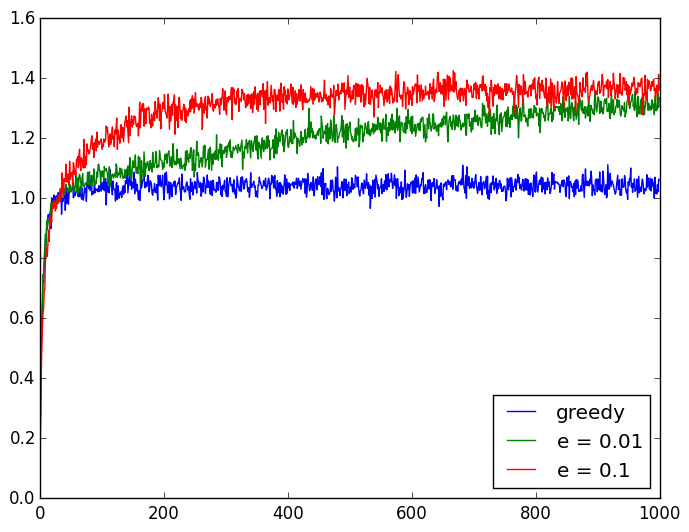

PyObject <matplotlib.legend.Legend object at 0x124778410>

In [132]:
pg    = plot(a_greedy)
p_001 = plot(a_ϵ_001)
p_01  = plot(a_ϵ_01)
legend( [pg,p_001,p_01], ["greedy", "e = 0.01", "e = 0.1"], loc=4)

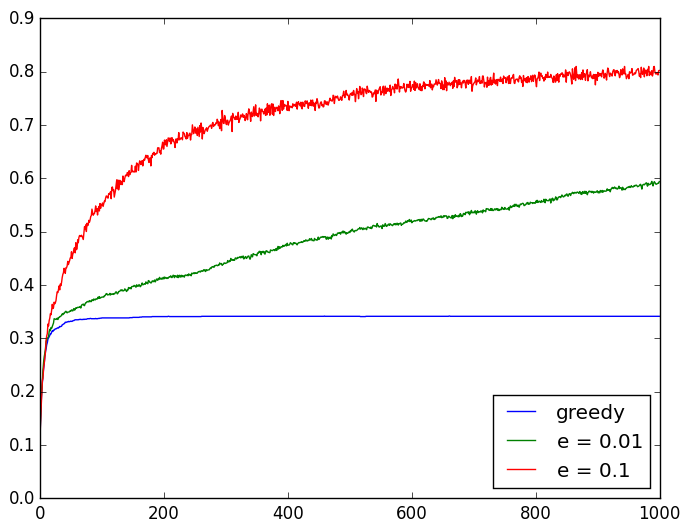

PyObject <matplotlib.legend.Legend object at 0x1249e45d0>

In [133]:
pg    = plot(p_greedy)
p_001 = plot(p_ϵ_001)
p_01  = plot(p_ϵ_01)
legend( [pg,p_001,p_01], ["greedy", "e = 0.01", "e = 0.1"], loc=4)